## Imports

In [3]:
%%capture
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
from collections import defaultdict
from statistics import mean
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

!pip install transformers
from transformers import pipeline
from collections import Counter

## Load data

In [4]:

# Download NLTK resources if not already downloaded
nltk.download('vader_lexicon')
# Read the dataset text file
file_path = '/content/The Giver by Lois Lowry (full-text) (1).txt'
with open(file_path, 'r') as file:
    data = file.read()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
print(data)

The Giver
Lois Lowry

Houghton Mifflin Company
Boston

For all the children
To whom we entrust the future

The Giver

Chapter-1
It was almost December, and Jonas was beginning to be
frightened. No. Wrong word, Jonas thought. Frightened meant
that deep, sickening feeling of something terrible about to
happen. Frightened was the way he had felt a year ago when an
unidentified aircraft had overflown the community twice. He
had seen it both times. Squinting toward the sky, he had seen
the sleek jet, almost a blur at its high speed, go past, and a
second later heard the blast of sound that followed. Then one
more time, a moment later, from the opposite direction, the
same plane.
At first, he had been only fascinated. He had never seen
aircraft so close, for it was against the rules for Pilots to fly
over the community. Occasionally, when supplies were delivered by cargo planes to the landing field across the river, the
children rode their bicycles to the riverbank and watched,
intrigued, 

## Preprocess

In [6]:
# Assuming the text file is read into the variable 'data' as mentioned earlier
chapters = {}  # Dictionary to store chapters
for i in range(1, 24):  # Loop from 1 to 23
    chapter_marker = f"Chapter-{i}"  # Create the chapter marker string
    start_index = data.find(chapter_marker)  # Find the starting index of the chapter
    if start_index != -1:
        end_index = data.find(f"Chapter-{i + 1}")  # Find the end index of the chapter
        if end_index == -1:
            chapter = data[start_index:]  # If it's the last chapter, consider until the end
        else:
            chapter = data[start_index:end_index]  # Extract the chapter text
        chapters[f"Chapter-{i}"] = chapter  # Store the chapter in the dictionary

# Print or display individual chapters
for chapter, text in chapters.items():
    print(f"*** {chapter} ***")
    print(text)


*** Chapter-1 ***
Chapter-1
It was almost December, and Jonas was beginning to be
frightened. No. Wrong word, Jonas thought. Frightened meant
that deep, sickening feeling of something terrible about to
happen. Frightened was the way he had felt a year ago when an
unidentified aircraft had overflown the community twice. He
had seen it both times. Squinting toward the sky, he had seen
the sleek jet, almost a blur at its high speed, go past, and a
second later heard the blast of sound that followed. Then one
more time, a moment later, from the opposite direction, the
same plane.
At first, he had been only fascinated. He had never seen
aircraft so close, for it was against the rules for Pilots to fly
over the community. Occasionally, when supplies were delivered by cargo planes to the landing field across the river, the
children rode their bicycles to the riverbank and watched,
intrigued, the unloading and then the takeoff directed to the
west, always away from the community.
But the aircr

In [7]:

import nltk
nltk.download('stopwords')

def preprocess_text_advanced(text):
    text = text.lower()  # Convert text to lowercase
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

chapters = {}
chapter_marker = "Chapter-"
chapter_count = 1
start_index = 0

while True:
    chapter_start = data.find(chapter_marker, start_index)
    if chapter_start == -1:
        break
    chapter_end = data.find(chapter_marker, chapter_start + 1)
    if chapter_end == -1:
        chapter_end = len(data)

    chapter_text = data[chapter_start:chapter_end].strip()
    chapters[f"Chapter-{chapter_count}"] = chapter_text
    chapter_count += 1
    start_index = chapter_end

# Preprocess each chapter and store in preprocessed_chapters dictionary
preprocessed_chapters = {}
for chapter_title, chapter_text in chapters.items():
    preprocessed_chapters[chapter_title] = preprocess_text_advanced(chapter_text)

# Display preprocessed text for all chapters
for chapter, text in preprocessed_chapters.items():
    print(f"*** {chapter} ***")
    print(text)


*** Chapter-1 ***
chapter1 almost december jonas beginning frightened wrong word jonas thought frightened meant deep sickening feeling something terrible happen frightened way felt year ago unidentified aircraft overflown community twice seen times squinting toward sky seen sleek jet almost blur high speed go past second later heard blast sound followed one time moment later opposite direction plane first fascinated never seen aircraft close rules pilots fly community occasionally supplies delivered cargo planes landing field across river children rode bicycles riverbank watched intrigued unloading takeoff directed west always away community aircraft year ago different squat fatbellied cargo plane needlenosed singlepilot jet jonas looking around anxiously seen others — adults well children — stop wait confused explanation frightening event 1 instantly obediently jonas dropped bike side path behind family’s dwelling run indoors stayed alone parents work little sister lily childcare cent

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **chunk size estimate**

##Making chunks so the model can easily/better analyse the emotion present in chapter (chunk-wise)

In [8]:
words_per_chapter = {}

# Calculate total words for each chapter
for chapter_title, chapter_text in chapters.items():
    preprocessed_text = preprocess_text_advanced(chapter_text)
    tokens = nltk.word_tokenize(preprocessed_text)
    word_count = len(tokens)
    words_per_chapter[chapter_title] = word_count

# Display total words for each chapter
for chapter_title, word_count in words_per_chapter.items():
    print(f"Chapter '{chapter_title}' - Total Words: {word_count}")


Chapter 'Chapter-1' - Total Words: 1550
Chapter 'Chapter-2' - Total Words: 1426
Chapter 'Chapter-3' - Total Words: 875
Chapter 'Chapter-4' - Total Words: 1196
Chapter 'Chapter-5' - Total Words: 858
Chapter 'Chapter-6' - Total Words: 1349
Chapter 'Chapter-7' - Total Words: 1148
Chapter 'Chapter-8' - Total Words: 694
Chapter 'Chapter-9' - Total Words: 1035
Chapter 'Chapter-10' - Total Words: 772
Chapter 'Chapter-11' - Total Words: 979
Chapter 'Chapter-12' - Total Words: 1061
Chapter 'Chapter-13' - Total Words: 1660
Chapter 'Chapter-14' - Total Words: 992
Chapter 'Chapter-15' - Total Words: 314
Chapter 'Chapter-16' - Total Words: 981
Chapter 'Chapter-17' - Total Words: 1101
Chapter 'Chapter-18' - Total Words: 763
Chapter 'Chapter-19' - Total Words: 745
Chapter 'Chapter-20' - Total Words: 1323
Chapter 'Chapter-21' - Total Words: 921
Chapter 'Chapter-22' - Total Words: 508
Chapter 'Chapter-23' - Total Words: 675


In [9]:
chapter_lengths = [
    1550, 1426, 875, 1196, 858, 1349, 1148, 694, 1035, 772,
    979, 1061, 1660, 992, 314, 981, 1101, 763, 745, 1323,
    921, 508, 675
]

average_length = sum(chapter_lengths) / len(chapter_lengths)
print(f"Average Chapter Length: {average_length}")


Average Chapter Length: 996.7826086956521


In [10]:
max_length = max(chapter_lengths)
print(f"Maximum Chapter Length: {max_length}")

Maximum Chapter Length: 1660


# chunks making

In [11]:
desired_chunk_size = 150

# Function to split chapters into chunks of desired size
def split_chapter_into_chunks(chapter_text, chunk_size):
    tokens = chapter_text.split()
    num_chunks = len(tokens) // chunk_size + (len(tokens) % chunk_size > 0)  # Calculate number of chunks
    chunks = []

    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = min((i + 1) * chunk_size, len(tokens))
        chunk = ' '.join(tokens[start_idx:end_idx])
        chunks.append(chunk)

    return chunks

# Convert each chapter into chunks of 300 words
chapters_chunks = {}
for chapter, text in preprocessed_chapters.items():
    chunks = split_chapter_into_chunks(text, desired_chunk_size)
    chapters_chunks[chapter] = chunks

# Print or access individual chapters' chunks
for chapter, chunks in chapters_chunks.items():
    print(f"*** {chapter} ***")
    for i, chunk in enumerate(chunks, start=1):
        print(f"Chunk {i}: {chunk}")
    print()


*** Chapter-1 ***
Chunk 1: chapter1 almost december jonas beginning frightened wrong word jonas thought frightened meant deep sickening feeling something terrible happen frightened way felt year ago unidentified aircraft overflown community twice seen times squinting toward sky seen sleek jet almost blur high speed go past second later heard blast sound followed one time moment later opposite direction plane first fascinated never seen aircraft close rules pilots fly community occasionally supplies delivered cargo planes landing field across river children rode bicycles riverbank watched intrigued unloading takeoff directed west always away community aircraft year ago different squat fatbellied cargo plane needlenosed singlepilot jet jonas looking around anxiously seen others — adults well children — stop wait confused explanation frightening event 1 instantly obediently jonas dropped bike side path behind family’s dwelling run indoors stayed alone parents work little sister lily child

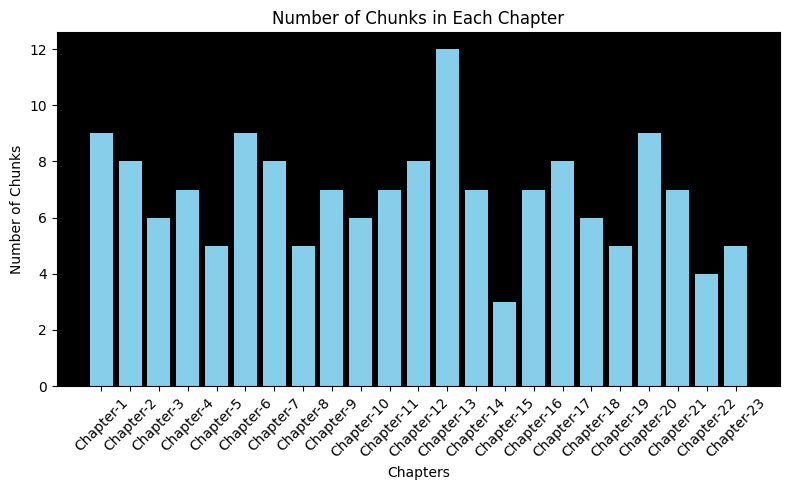

In [12]:

# Function to analyze emotions for each chunk
def analyze_emotions_for_chunks(chapters_chunks):
    num_chunks_per_chapter = []  # List to store the number of chunks for each chapter

    for chapter, chunks in chapters_chunks.items():
        num_chunks = len(chunks)  # Calculate the number of chunks for each chapter
        num_chunks_per_chapter.append(num_chunks)
        #print(f"Chapter {chapter}: Number of Chunks = {num_chunks}")

    # Plotting the graph for number of chunks for each chapter with a black background
    plt.figure(figsize=(8, 5))
    plt.bar(chapters_chunks.keys(), num_chunks_per_chapter, color='skyblue')
    plt.xlabel('Chapters')
    plt.ylabel('Number of Chunks')
    plt.title('Number of Chunks in Each Chapter')
    plt.xticks(rotation=45)

    # Set the background color to black
    plt.gca().set_facecolor('black')

    plt.tight_layout()
    plt.show()

# Assuming chapters_chunks is the dictionary containing chunks for each chapter
analyze_emotions_for_chunks(chapters_chunks)


## Analysis

In [13]:

# Load the emotion analysis model
emotion_analysis = pipeline('sentiment-analysis', model='j-hartmann/emotion-english-distilroberta-base')

# Function to analyze emotions for each chunk and store the results
def analyze_emotions_for_chunks(chapters_chunks):
    chunks_emotions = {}

    for chapter, chunks in chapters_chunks.items():
        print(f"*** {chapter} ***")
        chapter_emotions = []

        # Analyze emotions for each chunk
        for i, chunk in enumerate(chunks, start=1):
            emotions_result = emotion_analysis(chunk)
            chapter_emotions.append(emotions_result)
            print(f"Chunk {i}: {emotions_result}")

        chunks_emotions[chapter] = chapter_emotions
        print()

    return chunks_emotions

# Store emotion analysis results for each chunk in a dictionary
chunks_emotions_data = analyze_emotions_for_chunks(chapters_chunks)

*** Chapter-1 ***
Chunk 1: [{'label': 'fear', 'score': 0.9939613938331604}]
Chunk 2: [{'label': 'fear', 'score': 0.9722192287445068}]
Chunk 3: [{'label': 'joy', 'score': 0.9235433340072632}]
Chunk 4: [{'label': 'anger', 'score': 0.9911870360374451}]
Chunk 5: [{'label': 'fear', 'score': 0.9872870445251465}]
Chunk 6: [{'label': 'surprise', 'score': 0.5583490133285522}]
Chunk 7: [{'label': 'sadness', 'score': 0.976861298084259}]
Chunk 8: [{'label': 'fear', 'score': 0.976742684841156}]
Chunk 9: [{'label': 'fear', 'score': 0.9942817687988281}]

*** Chapter-2 ***
Chunk 1: [{'label': 'sadness', 'score': 0.9011468887329102}]
Chunk 2: [{'label': 'joy', 'score': 0.9555894732475281}]
Chunk 3: [{'label': 'anger', 'score': 0.8070931434631348}]
Chunk 4: [{'label': 'surprise', 'score': 0.9715145826339722}]
Chunk 5: [{'label': 'surprise', 'score': 0.9325969815254211}]
Chunk 6: [{'label': 'surprise', 'score': 0.8071483969688416}]
Chunk 7: [{'label': 'fear', 'score': 0.4795159101486206}]
Chunk 8: [{'lab

## VIsualize Results

In [14]:

# Function to visualize emotions for chunks within each chapter using stored results
def visualize_emotions_for_chapters(chunks_emotions):
    for chapter, chunk_emotions in chunks_emotions.items():
        print(f"*** {chapter} ***")

        # Lists to store emotion scores for each chunk within the chapter
        emotions_data = {emotion: [] for emotion in ['anger', 'joy', 'sadness', 'surprise', 'fear', 'neutral', 'disgust']}

        # Retrieve stored emotion scores for each chunk
        for chunk_result in chunk_emotions:
            for emotion in emotions_data:
                emo_score = next((emo['score'] for emo in chunk_result if emo['label'] == emotion), 0.0)
                emotions_data[emotion].append(emo_score)

        # Create subplots for the line plot and the pie chart
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Plot line graph for each chapter
        for emotion, scores in emotions_data.items():
            ax1.plot(range(1, len(chunk_emotions) + 1), scores, marker='o', label=emotion.capitalize())

        ax1.set_xlabel('Chunks')
        ax1.set_ylabel('Emotion Score')
        ax1.set_title(f'Emotions in {chapter}')
        ax1.legend()

        # Find the overall dominant emotion for the chapter
        overall_emotion = Counter({emotion: sum(scores) for emotion, scores in emotions_data.items()})
        dominant_emotion = overall_emotion.most_common(1)[0][0]

        # Create a pie chart to visualize the dominant emotion
        ax2.pie(list(overall_emotion.values()), labels=list(overall_emotion.keys()), autopct='%1.1f%%', startangle=140)
        ax2.set_title(f'Dominant Emotion Distribution\nDominant Emotion: {dominant_emotion.capitalize()}')
        ax2.axis('equal')

        plt.tight_layout()
        plt.show()
        print()

# Visualize emotions for chunks within each chapter using stored results
visualize_emotions_for_chapters(chunks_emotions_data)

Output hidden; open in https://colab.research.google.com to view.